In [90]:
# load dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Align Prediction Features and Model-creation Features

In [91]:
# import data
from mega import model_df, unplayed_games

df = model_df.copy()
unplayed_games_clean = unplayed_games[3:].copy()

In [92]:
# check imported file
df.head()

,Gm#,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
0,1,L,D,A,MIL,31,0.258065,8,1,8,0.351351,4,38,0.315789,12,3,11,0.333333,1
1,2,W,N,A,MIL,32,0.281250,9,1,5,0.342857,3,37,0.378378,14,2,11,0.390244,2
2,3,W,N,A,MIL,34,0.264706,9,1,5,0.305556,2,37,0.405405,15,3,8,0.463415,4
3,4,W,D,H,SDP,33,0.212121,7,0,8,0.235294,1,0,0.000000,0,0,0,0.000000,0
4,5,W,N,H,SDP,33,0.242424,8,0,4,0.305556,3,0,0.000000,0,0,0,0.000000,0


In [93]:
# check imported file
unplayed_games_clean.head()

,Gm#,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
1816,137,8:10 pm,Game Preview and Matchups,H,BAL,-1,-1.0,-1,-1,-1,-1.0,-1,29,0.310345,9,0,9,0.393939,4
1817,138,3:10 pm,Game Preview and Matchups,H,BAL,-1,-1.0,-1,-1,-1,-1.0,-1,30,0.200000,6,0,11,0.250000,2
1818,139,7:20 pm,Game Preview and Matchups,A,ATL,-1,-1.0,-1,-1,-1,-1.0,-1,31,0.193548,-1,0,-1,0.218750,-1
1819,140,7:20 pm,Game Preview and Matchups,A,ATL,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1.000000,-1,-1,-1,-1.000000,-1
1820,141,7:20 pm,Game Preview and Matchups,A,ATL,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1.000000,-1,-1,-1,-1.000000,-1


In [94]:
# drop the "Opp" column, so that we dont have to encode all the team names. 
# Not all teams that are in the model df "df" exist in the prediction df "unplayed_games_clean"
# this ensures that the same number of features are used between creating the RF model and predicting

df = df.copy().drop(columns="Opp")


# drop Opp later in "unplayed_games_clean" in the code, after this column is no longer needed for season calcuations

In [95]:
print(f"Model df columns = {df.columns}")
print()
print(f"Prediction df columns = {unplayed_games_clean.columns}")

Model df columns = Index(['Gm#', 'W/L', 'D/N', 'H/A', 'COL_at_bats', 'COL_ba', 'COL_hits',
       'COL_hr', 'COL_kk', 'COL_obp', 'COL_walks', 'Opp_at_bats', 'Opp_ba',
       'Opp_hits', 'OPP_HR_Column', 'OPP_kk', 'Opp_obp', 'Opp_walks'],
      dtype='object')

Prediction df columns = Index(['Gm#', 'W/L', 'D/N', 'H/A', 'Opp', 'COL_at_bats', 'COL_ba', 'COL_hits',
       'COL_hr', 'COL_kk', 'COL_obp', 'COL_walks', 'Opp_at_bats', 'Opp_ba',
       'Opp_hits', 'OPP_HR_Column', 'OPP_kk', 'Opp_obp', 'Opp_walks'],
      dtype='object')


# Prep Data for ML

In [96]:
# check data types

df.dtypes

Gm#                int64
W/L               object
D/N               object
H/A               object
COL_at_bats        int64
COL_ba           float64
COL_hits           int64
COL_hr             int64
COL_kk             int64
COL_obp          float64
COL_walks          int64
Opp_at_bats        int64
Opp_ba           float64
Opp_hits          object
OPP_HR_Column      int64
OPP_kk            object
Opp_obp          float64
Opp_walks          int64
dtype: object

In [97]:
df = df.rename(columns={"OPP_HR_Column": "Opp_hr"})

In [98]:
# confirm there are only 2 values in the win/loss column
uniquevalues = df["W/L"].unique()
print(uniquevalues)

['L' 'W']


In [99]:
# encode object columns as needed
# intialize encoders
le = LabelEncoder()

In [100]:
# encode columns with only 2 unique values
df["D/N"] = le.fit_transform(df["D/N"])
df["H/A"] = le.fit_transform(df["H/A"])
df["W/L"] = le.fit_transform(df["W/L"])
df

,Gm#,W/L,D/N,H/A,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,Opp_hr,OPP_kk,Opp_obp,Opp_walks
0,1,0,0,0,31,0.258065,8,1,8,0.351351,4,38,0.315789,12,3,11,0.333333,1
1,2,1,1,0,32,0.281250,9,1,5,0.342857,3,37,0.378378,14,2,11,0.390244,2
2,3,1,1,0,34,0.264706,9,1,5,0.305556,2,37,0.405405,15,3,8,0.463415,4
3,4,1,0,1,33,0.212121,7,0,8,0.235294,1,0,0.000000,0,0,0,0.000000,0
4,5,1,1,1,33,0.242424,8,0,4,0.305556,3,0,0.000000,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,129,0,1,0,28,0.178571,5,2,5,0.233333,2,31,0.129032,4,0,9,0.205882,3
1809,130,1,0,0,29,0.172414,5,1,9,0.294118,4,39,0.333333,13,2,14,0.386364,4
1810,131,0,0,0,35,0.342857,12,5,6,0.410256,3,29,0.206897,6,0,8,0.323529,5
1811,132,1,1,1,34,0.264706,9,0,8,0.324324,3,28,0.214286,6,1,11,0.312500,4


In [101]:
# debug: Locate the positions of "error"
error_positions = df.isin(['error'])

# get the indices of "error" values
error_indices = [(row, col) for row, col in zip(*error_positions.to_numpy().nonzero())]

# Display the indices
print("\nIndices of 'error' values:")
print(error_indices)


Indices of 'error' values:
[(37, 15), (1118, 13)]


In [102]:
# apply new values to those data cells
df.iloc[37, 15] = 0
df.iloc[1118, 13] = 0


In [103]:
# ensure column values are numerical
df['OPP_kk'] = pd.to_numeric(df['OPP_kk'], errors='coerce')
df['Opp_hits'] = pd.to_numeric(df['Opp_hits'], errors='coerce')

In [104]:
# check dtypes for all columns again
df.dtypes

Gm#              int64
W/L              int32
D/N              int32
H/A              int32
COL_at_bats      int64
COL_ba         float64
COL_hits         int64
COL_hr           int64
COL_kk           int64
COL_obp        float64
COL_walks        int64
Opp_at_bats      int64
Opp_ba         float64
Opp_hits         int64
Opp_hr           int64
OPP_kk           int64
Opp_obp        float64
Opp_walks        int64
dtype: object

In [105]:
# Get target variable ("win/loss" column) - y 
y = df["W/L"]
len(y)

1751

In [106]:
# Get the features - X
X = df.copy()
X =X.drop(columns = "W/L", axis =1)
X

,Gm#,D/N,H/A,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,Opp_hr,OPP_kk,Opp_obp,Opp_walks
0,1,0,0,31,0.258065,8,1,8,0.351351,4,38,0.315789,12,3,11,0.333333,1
1,2,1,0,32,0.281250,9,1,5,0.342857,3,37,0.378378,14,2,11,0.390244,2
2,3,1,0,34,0.264706,9,1,5,0.305556,2,37,0.405405,15,3,8,0.463415,4
3,4,0,1,33,0.212121,7,0,8,0.235294,1,0,0.000000,0,0,0,0.000000,0
4,5,1,1,33,0.242424,8,0,4,0.305556,3,0,0.000000,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,129,1,0,28,0.178571,5,2,5,0.233333,2,31,0.129032,4,0,9,0.205882,3
1809,130,0,0,29,0.172414,5,1,9,0.294118,4,39,0.333333,13,2,14,0.386364,4
1810,131,0,0,35,0.342857,12,5,6,0.410256,3,29,0.206897,6,0,8,0.323529,5
1811,132,1,1,34,0.264706,9,0,8,0.324324,3,28,0.214286,6,1,11,0.312500,4


In [107]:
X.columns

Index(['Gm#', 'D/N', 'H/A', 'COL_at_bats', 'COL_ba', 'COL_hits', 'COL_hr',
       'COL_kk', 'COL_obp', 'COL_walks', 'Opp_at_bats', 'Opp_ba', 'Opp_hits',
       'Opp_hr', 'OPP_kk', 'Opp_obp', 'Opp_walks'],
      dtype='object')

### split and scale data

In [108]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
# 9, 

In [109]:
# scale the data!
# Initialize the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same parameters
X_test_scaled = scaler.transform(X_test)



# Decision Tree

In [110]:
# create decision tree classifier model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [111]:
# Validate the model accuracy with model.score
print('Decision Tree Classifier Model - Train Accuracy: %.3f' % dt_model.score(X_train_scaled, y_train))
print('Decision Tree Classifier Model - Test Accuracy: %.3f' % dt_model.score(X_test_scaled, y_test))

Decision Tree Classifier Model - Train Accuracy: 1.000
Decision Tree Classifier Model - Test Accuracy: 0.724


- Model test score is less than project-allowed minimum. 
- Next: explore tuning the model to improve performance.

In [112]:
# hypertune the model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report 

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [70,80, 90],
    'min_samples_leaf': [6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [113]:
# Evaluate on the test set
y_pred = grid_search.predict(X_test_scaled)
report = classification_report(y_test, y_pred)

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)



Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 90}
Best Cross-Validation Score: 0.7532058166197428


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       275
           1       0.69      0.69      0.69       163

    accuracy                           0.77       438
   macro avg       0.75      0.75      0.75       438
weighted avg       0.77      0.77      0.77       438



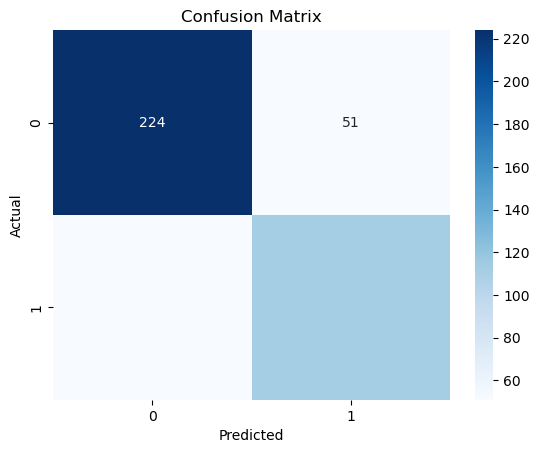

In [114]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_dt_pred = grid_search.predict(X_test_scaled)
conf_matrix_dt= confusion_matrix(y_test, y_dt_pred)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_dt_pred))

# Visualize the confusion matrix
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [115]:
# create decision tree classifier model
dt_model2 = DecisionTreeClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 8, min_samples_split= 80)
dt_model2.fit(X_train_scaled, y_train)

# Validate the model accuracy with model.score
print('Decision Tree Classifier Model - Train Accuracy: %.3f' % dt_model2.score(X_train_scaled, y_train))
print('Decision Tree Classifier Model - Test Accuracy: %.3f' % dt_model2.score(X_test_scaled, y_test))

Decision Tree Classifier Model - Train Accuracy: 0.807
Decision Tree Classifier Model - Test Accuracy: 0.758


- Tuning the model did not bring up the test accuracy score to acceptable levels. 

# Random Forest

In [116]:
# Create the random forest classifier model
# with n_estimators=128 | change as needed, or run multiple n_estimators...?
rf_model = RandomForestClassifier(n_estimators=128, criterion="gini", max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0, max_features="auto", random_state=0)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

c:\Users\elcoo\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_weight_fraction_leaf=0,
                       n_estimators=128, random_state=0)

In [117]:
# Validate the model by checking the model accuracy with model.score
print('Random Forest Classifier Model - Train Accuracy: %.3f' % rf_model.score(X_train_scaled, y_train))
print('Random Forest Classifier Model - Test Accuracy: %.3f' % rf_model.score(X_test_scaled, y_test))

Random Forest Classifier Model - Train Accuracy: 1.000
Random Forest Classifier Model - Test Accuracy: 0.822


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       275
           1       0.79      0.72      0.75       163

    accuracy                           0.82       438
   macro avg       0.81      0.80      0.81       438
weighted avg       0.82      0.82      0.82       438



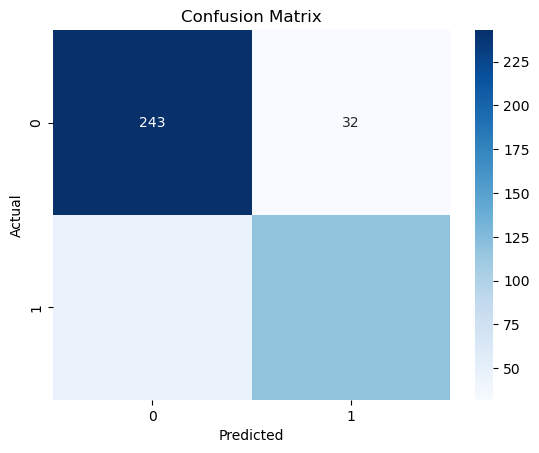

In [118]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_rf_pred = rf_model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_rf_pred)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_rf_pred))

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Prepping Prediction Data

In [122]:
# convert w/l column values into datatime objects, eventually transfer into D/N column
unplayed_games_clean['W/L'] = pd.to_datetime(unplayed_games_clean['W/L'], format='mixed').dt.time
unplayed_games_clean.head()

,Gm#,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks,Gm#
1816,137,20:10:00,Game Preview and Matchups,H,BAL,-1,-1.0,-1,-1,-1,-1.0,-1,29,0.310345,9,0,9,0.393939,4,137
1817,138,15:10:00,Game Preview and Matchups,H,BAL,-1,-1.0,-1,-1,-1,-1.0,-1,30,0.200000,6,0,11,0.250000,2,138
1818,139,19:20:00,Game Preview and Matchups,A,ATL,-1,-1.0,-1,-1,-1,-1.0,-1,31,0.193548,-1,0,-1,0.218750,-1,139
1819,140,19:20:00,Game Preview and Matchups,A,ATL,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1.000000,-1,-1,-1,-1.000000,-1,140
1820,141,19:20:00,Game Preview and Matchups,A,ATL,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1.000000,-1,-1,-1,-1.000000,-1,141


In [123]:
# convert D/N column to D/N values
# Define the threshold time
threshold_time = pd.to_datetime('17:00:00').time()
unplayed_games_clean['D/N'] = unplayed_games_clean['W/L'].apply(lambda x: 'D' if x < threshold_time else 'N')
unplayed_games_clean.head()


,Gm#,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks,Gm#
1816,137,20:10:00,N,H,BAL,-1,-1.0,-1,-1,-1,-1.0,-1,29,0.310345,9,0,9,0.393939,4,137
1817,138,15:10:00,D,H,BAL,-1,-1.0,-1,-1,-1,-1.0,-1,30,0.200000,6,0,11,0.250000,2,138
1818,139,19:20:00,N,A,ATL,-1,-1.0,-1,-1,-1,-1.0,-1,31,0.193548,-1,0,-1,0.218750,-1,139
1819,140,19:20:00,N,A,ATL,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1.000000,-1,-1,-1,-1.000000,-1,140
1820,141,19:20:00,N,A,ATL,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1.000000,-1,-1,-1,-1.000000,-1,141


In [124]:
# W/L column is the target and should not have assigned values
unplayed_games_clean['W/L'] = "NaN"
unplayed_games_clean.head()

,Gm#,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks,Gm#
1816,137,NaN,N,H,BAL,-1,-1.0,-1,-1,-1,-1.0,-1,29,0.310345,9,0,9,0.393939,4,137
1817,138,NaN,D,H,BAL,-1,-1.0,-1,-1,-1,-1.0,-1,30,0.200000,6,0,11,0.250000,2,138
1818,139,NaN,N,A,ATL,-1,-1.0,-1,-1,-1,-1.0,-1,31,0.193548,-1,0,-1,0.218750,-1,139
1819,140,NaN,N,A,ATL,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1.000000,-1,-1,-1,-1.000000,-1,140
1820,141,NaN,N,A,ATL,-1,-1.0,-1,-1,-1,-1.0,-1,-1,-1.000000,-1,-1,-1,-1.000000,-1,141


### Infill opponent data (seasonal averages) using custom functions

In [33]:
from functions import team_ba_season, team_obp_season, team_avg_stats_pergame

In [37]:
# apply current team on base percentages for the season to future games
unplayed_games_clean['COL_obp'] = team_obp_season("COL", df)
unplayed_games_clean['Opp_obp'] = unplayed_games_clean.apply(lambda row: team_obp_season(row['Opp'], df), axis=1)

In [40]:
# apply current team batting averages for the season to future games
unplayed_games_clean['COL_ba'] = team_ba_season("COL")
unplayed_games_clean['Opp_ba'] = unplayed_games_clean.apply(lambda row: team_ba_season(row['Opp']), axis=1)


Getting Batting Data: 2024 BAL
Getting Batting Data: 2024 BAL
Getting Batting Data: 2024 ATL
Getting Batting Data: 2024 ATL
Getting Batting Data: 2024 ATL
Getting Batting Data: 2024 MIL
Getting Batting Data: 2024 MIL
Getting Batting Data: 2024 MIL
Getting Batting Data: 2024 DET
Getting Batting Data: 2024 DET
Getting Batting Data: 2024 DET
Getting Batting Data: 2024 CHC
Getting Batting Data: 2024 CHC
Getting Batting Data: 2024 CHC
Getting Batting Data: 2024 ARI
Getting Batting Data: 2024 ARI
Getting Batting Data: 2024 ARI
Getting Batting Data: 2024 LAD
Getting Batting Data: 2024 LAD
Getting Batting Data: 2024 LAD
Getting Batting Data: 2024 STL
Getting Batting Data: 2024 STL
Getting Batting Data: 2024 STL
Getting Batting Data: 2024 LAD
Getting Batting Data: 2024 LAD
Getting Batting Data: 2024 LAD


In [42]:
# apply current team at bats for the season to future games
unplayed_games_clean['COL_at_bats'] = team_avg_stats_pergame("COL", "at bats", df)
unplayed_games_clean['Opp_at_bats'] = unplayed_games_clean.apply(lambda row: team_avg_stats_pergame(row['Opp'], "at bats", df), axis=1)

Getting Batting Data: 2024 BAL
http://www.baseball-reference.com/teams/BAL/2024-schedule-scores.shtml
Getting Batting Data: 2024 BAL
http://www.baseball-reference.com/teams/BAL/2024-schedule-scores.shtml
Getting Batting Data: 2024 ATL
http://www.baseball-reference.com/teams/ATL/2024-schedule-scores.shtml
Getting Batting Data: 2024 ATL
http://www.baseball-reference.com/teams/ATL/2024-schedule-scores.shtml
Getting Batting Data: 2024 ATL
http://www.baseball-reference.com/teams/ATL/2024-schedule-scores.shtml
Getting Batting Data: 2024 MIL
http://www.baseball-reference.com/teams/MIL/2024-schedule-scores.shtml
Getting Batting Data: 2024 MIL
http://www.baseball-reference.com/teams/MIL/2024-schedule-scores.shtml
Getting Batting Data: 2024 MIL
http://www.baseball-reference.com/teams/MIL/2024-schedule-scores.shtml
Getting Batting Data: 2024 DET
http://www.baseball-reference.com/teams/DET/2024-schedule-scores.shtml
Getting Batting Data: 2024 DET
http://www.baseball-reference.com/teams/DET/2024-sc

In [44]:
# apply current team hits for the season to future games
unplayed_games_clean['COL_hits'] = team_avg_stats_pergame("COL", "hits", df)
unplayed_games_clean['Opp_hits'] = unplayed_games_clean.apply(lambda row: team_avg_stats_pergame(row['Opp'], "hits", df), axis=1)

Getting Batting Data: 2024 BAL
http://www.baseball-reference.com/teams/BAL/2024-schedule-scores.shtml
Getting Batting Data: 2024 BAL
http://www.baseball-reference.com/teams/BAL/2024-schedule-scores.shtml
Getting Batting Data: 2024 ATL
http://www.baseball-reference.com/teams/ATL/2024-schedule-scores.shtml
Getting Batting Data: 2024 ATL
http://www.baseball-reference.com/teams/ATL/2024-schedule-scores.shtml
Getting Batting Data: 2024 ATL
http://www.baseball-reference.com/teams/ATL/2024-schedule-scores.shtml
Getting Batting Data: 2024 MIL
http://www.baseball-reference.com/teams/MIL/2024-schedule-scores.shtml
Getting Batting Data: 2024 MIL
http://www.baseball-reference.com/teams/MIL/2024-schedule-scores.shtml
Getting Batting Data: 2024 MIL
http://www.baseball-reference.com/teams/MIL/2024-schedule-scores.shtml
Getting Batting Data: 2024 DET
http://www.baseball-reference.com/teams/DET/2024-schedule-scores.shtml
Getting Batting Data: 2024 DET
http://www.baseball-reference.com/teams/DET/2024-sc

In [46]:
# apply current team home runs for the season to future games
# drop redundant column
unplayed_games_clean = unplayed_games_clean.drop(columns="OPP_HR_Column")
unplayed_games_clean['COL_hr'] = team_avg_stats_pergame("COL", "home runs", df)
unplayed_games_clean['Opp_hr'] = unplayed_games_clean.apply(lambda row: team_avg_stats_pergame(row['Opp'], "home runs", df), axis=1)


Getting Batting Data: 2024 BAL
http://www.baseball-reference.com/teams/BAL/2024-schedule-scores.shtml
Getting Batting Data: 2024 BAL
http://www.baseball-reference.com/teams/BAL/2024-schedule-scores.shtml
Getting Batting Data: 2024 ATL
http://www.baseball-reference.com/teams/ATL/2024-schedule-scores.shtml
Getting Batting Data: 2024 ATL
http://www.baseball-reference.com/teams/ATL/2024-schedule-scores.shtml
Getting Batting Data: 2024 ATL
http://www.baseball-reference.com/teams/ATL/2024-schedule-scores.shtml
Getting Batting Data: 2024 MIL
http://www.baseball-reference.com/teams/MIL/2024-schedule-scores.shtml
Getting Batting Data: 2024 MIL
http://www.baseball-reference.com/teams/MIL/2024-schedule-scores.shtml
Getting Batting Data: 2024 MIL
http://www.baseball-reference.com/teams/MIL/2024-schedule-scores.shtml
Getting Batting Data: 2024 DET
http://www.baseball-reference.com/teams/DET/2024-schedule-scores.shtml
Getting Batting Data: 2024 DET
http://www.baseball-reference.com/teams/DET/2024-sc

In [48]:
# apply current team strikeouts for the season to future games
unplayed_games_clean['COL_kk'] = team_avg_stats_pergame("COL", "strikeouts", df)
unplayed_games_clean['OPP_kk'] = unplayed_games_clean.apply(lambda row: team_avg_stats_pergame(row['Opp'], "strikeouts", df), axis=1)


Getting Batting Data: 2024 BAL
http://www.baseball-reference.com/teams/BAL/2024-schedule-scores.shtml
Getting Batting Data: 2024 BAL
http://www.baseball-reference.com/teams/BAL/2024-schedule-scores.shtml
Getting Batting Data: 2024 ATL
http://www.baseball-reference.com/teams/ATL/2024-schedule-scores.shtml
Getting Batting Data: 2024 ATL
http://www.baseball-reference.com/teams/ATL/2024-schedule-scores.shtml
Getting Batting Data: 2024 ATL
http://www.baseball-reference.com/teams/ATL/2024-schedule-scores.shtml
Getting Batting Data: 2024 MIL
http://www.baseball-reference.com/teams/MIL/2024-schedule-scores.shtml
Getting Batting Data: 2024 MIL
http://www.baseball-reference.com/teams/MIL/2024-schedule-scores.shtml
Getting Batting Data: 2024 MIL
http://www.baseball-reference.com/teams/MIL/2024-schedule-scores.shtml
Getting Batting Data: 2024 DET
http://www.baseball-reference.com/teams/DET/2024-schedule-scores.shtml
Getting Batting Data: 2024 DET
http://www.baseball-reference.com/teams/DET/2024-sc

In [50]:
# apply current team walks for the season to future games
unplayed_games_clean['COL_walks'] = team_avg_stats_pergame("COL", "walks", df)
unplayed_games_clean['Opp_walks'] = unplayed_games_clean.apply(lambda row: team_avg_stats_pergame(row['Opp'], "walks", df), axis=1)

Getting Batting Data: 2024 BAL
http://www.baseball-reference.com/teams/BAL/2024-schedule-scores.shtml
Getting Batting Data: 2024 BAL
http://www.baseball-reference.com/teams/BAL/2024-schedule-scores.shtml
Getting Batting Data: 2024 ATL
http://www.baseball-reference.com/teams/ATL/2024-schedule-scores.shtml
Getting Batting Data: 2024 ATL
http://www.baseball-reference.com/teams/ATL/2024-schedule-scores.shtml
Getting Batting Data: 2024 ATL
http://www.baseball-reference.com/teams/ATL/2024-schedule-scores.shtml
Getting Batting Data: 2024 MIL
http://www.baseball-reference.com/teams/MIL/2024-schedule-scores.shtml
Getting Batting Data: 2024 MIL
http://www.baseball-reference.com/teams/MIL/2024-schedule-scores.shtml
Getting Batting Data: 2024 MIL
http://www.baseball-reference.com/teams/MIL/2024-schedule-scores.shtml
Getting Batting Data: 2024 DET
http://www.baseball-reference.com/teams/DET/2024-schedule-scores.shtml
Getting Batting Data: 2024 DET
http://www.baseball-reference.com/teams/DET/2024-sc

,Gm#,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_kk,Opp_obp,Opp_walks,Opp_hr
1816,137,NaN,N,H,BAL,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,34.173611,.253,8.548611,8.256944,0.316,3.020833,1.451389
1817,138,NaN,D,H,BAL,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,34.173611,.253,8.548611,8.256944,0.316,3.020833,1.451389
1818,139,NaN,N,A,ATL,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.272727,.245,8.020979,8.993007,0.306,2.937063,1.265734
1819,140,NaN,N,A,ATL,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.272727,.245,8.020979,8.993007,0.306,2.937063,1.265734
1820,141,NaN,N,A,ATL,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.272727,.245,8.020979,8.993007,0.306,2.937063,1.265734
1821,142,NaN,N,A,MIL,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.832168,.278,8.454545,8.853147,0.328,3.741259,1.118881
1822,143,NaN,N,A,MIL,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.832168,.278,8.454545,8.853147,0.328,3.741259,1.118881
1823,144,NaN,D,A,MIL,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.832168,.278,8.454545,8.853147,0.328,3.741259,1.118881
1824,145,NaN,N,A,DET,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.361111,.191,7.812500,8.805556,0.298,2.812500,1.006944
1825,146,NaN,N,A,DET,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.361111,.191,7.812500,8.805556,0.298,2.812500,1.006944


In [51]:
# encode columns with only 2 unique values
le = LabelEncoder()

unplayed_games_clean["D/N"] = le.fit_transform(unplayed_games_clean["D/N"])
unplayed_games_clean["H/A"] = le.fit_transform(unplayed_games_clean["H/A"])
unplayed_games_clean.head()

,Gm#,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_kk,Opp_obp,Opp_walks,Opp_hr
1816,137,NaN,1,1,BAL,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,34.173611,.253,8.548611,8.256944,0.316,3.020833,1.451389
1817,138,NaN,0,1,BAL,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,34.173611,.253,8.548611,8.256944,0.316,3.020833,1.451389
1818,139,NaN,1,0,ATL,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.272727,.245,8.020979,8.993007,0.306,2.937063,1.265734
1819,140,NaN,1,0,ATL,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.272727,.245,8.020979,8.993007,0.306,2.937063,1.265734
1820,141,NaN,1,0,ATL,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.272727,.245,8.020979,8.993007,0.306,2.937063,1.265734


In [52]:
# now drop Opp and Gm#, not needed for predictions
opponents = unplayed_games_clean["Opp"]
unplayed_games_clean = unplayed_games_clean.copy().drop(columns=["Opp", "Gm#"])
unplayed_games_clean.head()

,W/L,D/N,H/A,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_kk,Opp_obp,Opp_walks,Opp_hr
1816,NaN,1,1,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,34.173611,.253,8.548611,8.256944,0.316,3.020833,1.451389
1817,NaN,0,1,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,34.173611,.253,8.548611,8.256944,0.316,3.020833,1.451389
1818,NaN,1,0,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.272727,.245,8.020979,8.993007,0.306,2.937063,1.265734
1819,NaN,1,0,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.272727,.245,8.020979,8.993007,0.306,2.937063,1.265734
1820,NaN,1,0,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.272727,.245,8.020979,8.993007,0.306,2.937063,1.265734


In [66]:
#export csv for backup - reloading the data takes a long time
unplayed_games_clean.to_csv('randomforest_support_csv_files/unplayed_games_populated.csv', index=False)

In [142]:
unplayed_games_final = pd.read_csv('randomforest_support_csv_files/unplayed_games_populated.csv')
unplayed = unplayed_games[3:].copy()
gm_col = unplayed['Gm#'].reset_index(drop=True)
unplayed_games_topred = pd.concat([unplayed_games_final, gm_col], axis=1)
pop_gm = unplayed_games_topred.pop('Gm#')
unplayed_games_topred.insert(0, "Gm#", pop_gm)
unplayed_games_topred

,Gm#,W/L,D/N,H/A,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_kk,Opp_obp,Opp_walks,Opp_hr
0,137,NaN,1,1,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,34.173611,0.253,8.548611,8.256944,0.316,3.020833,1.451389
1,138,NaN,0,1,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,34.173611,0.253,8.548611,8.256944,0.316,3.020833,1.451389
2,139,NaN,1,0,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.272727,0.245,8.020979,8.993007,0.306,2.937063,1.265734
3,140,NaN,1,0,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.272727,0.245,8.020979,8.993007,0.306,2.937063,1.265734
4,141,NaN,1,0,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.272727,0.245,8.020979,8.993007,0.306,2.937063,1.265734
5,142,NaN,1,0,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.832168,0.278,8.454545,8.853147,0.328,3.741259,1.118881
6,143,NaN,1,0,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.832168,0.278,8.454545,8.853147,0.328,3.741259,1.118881
7,144,NaN,0,0,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.832168,0.278,8.454545,8.853147,0.328,3.741259,1.118881
8,145,NaN,1,0,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.361111,0.191,7.812500,8.805556,0.298,2.812500,1.006944
9,146,NaN,1,0,33.011422,0.278016,9.374643,1.205026,7.342661,0.344419,3.214163,33.361111,0.191,7.812500,8.805556,0.298,2.812500,1.006944


### Separating Prediction Target Variable from Prediction Features

In [143]:
# get target and features
y_to_predict = unplayed_games_topred["W/L"].copy()
X_to_predict = unplayed_games_topred.drop(columns=["W/L"]).copy()

# Casting Predictions on Prediction Data

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the feature data
X_prediction_data = scaler.fit_transform(X_to_predict)


In [146]:
# make predictions

y_pred = rf_model.predict(X_prediction_data)

In [147]:
display(y_pred)
len(y_pred)


array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

26

# Create Mini Dataframe to show Game#, Opponent, and Prediction for W/L

In [59]:
# grab the date from original dataframe
from mega import mega_concat_df

mega_concat_df.columns
dates = mega_concat_df['Formatted_Date'].tail(26)

In [60]:
# equalize all index values for all separate pieces
dates = dates.reset_index(drop=True)
opponents = opponents.reset_index(drop=True)
winloss = pd.Series(y_pred)

In [65]:
# concat and rename columns for new minidataframe
predicted_winLoss_df = pd.concat([dates, opponents,winloss], axis=1, )
predicted_winLoss_df = predicted_winLoss_df.rename(columns = {0: "Win/Loss"})
predicted_winLoss_df['Win/Loss'] = predicted_winLoss_df['Win/Loss'].replace({0:"loss", 1:"win"})
predicted_winLoss_df

,Formatted_Date,Opp,Win/Loss
0,2024-08-31,BAL,loss
1,2024-09-01,BAL,loss
2,2024-09-03,ATL,loss
3,2024-09-04,ATL,loss
4,2024-09-05,ATL,loss
5,2024-09-06,MIL,win
6,2024-09-07,MIL,win
7,2024-09-08,MIL,win
8,2024-09-10,DET,loss
9,2024-09-11,DET,loss


# Visualizations

In [ ]:
# plot randomforest tree as a diagram
from sklearn.tree import plot_tree

# grab list of features from test data 
feature_list = X.columns.tolist()

# Visualize one of the trees from the forest
plt.figure(figsize=(240, 80))
plot_tree(rf_model.estimators_[0], feature_names=feature_list, class_names=['Lose[0]', 'Win[1]'], filled=True)
plt.title("Decision Tree from Random Forest")
plt.show()

In [ ]:
# plot feature importance chart
import matplotlib.pyplot as plt
import pandas as pd



# Extract feature importances from randomforest model
importances = rf_model.feature_importances_

# Get feature names from the training data
feature_names = X_train.columns

# Create a DataFrame using feature names and feature importances 
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance, descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_10_features = feature_importance_df.head(10)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 10))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()